In [20]:
import numpy as np
from matplotlib import pyplot as plt

In [21]:
'''
file2matrix主要实现将datingTestSet2.txt文件中的原始数据，转储为数组
'''
def file2matrix(filename): 
    fr = open(filename)
    arrayOLines = fr.readlines()# 按行读取txt（文件中的一行即为一组特征加分类标签，同行数据中前三个为特征，第四个为标签）
    numberOfLines = len(arrayOLines) # 记录txt总行数，即数据集样本数
    returnMat = np.zeros((numberOfLines,3))# 定义规模为(样本数，特征数)的全0填充数组
    classLabelVector = []# 定义列表用于存放所有样本的分类标签
    index = 0
    for line in arrayOLines:# 对于数据集每行，即对于每个样本，提取其样本特征值与标签
        line = line.strip() # 删除每行的空格
        listFromLine = line.split('\t')# 按制表符分割每行
        returnMat[index,:] = listFromLine[0:3] #将每行前3个特征值赋值给全0数组中第index行
        classLabelVector.append(int(listFromLine[-1]))# 将每行最后一个值，即标签，加入标签列表
        index +=1
    return returnMat,classLabelVector # 返回特征数组，标签列表

In [22]:
datingDataMat,datingLabels = file2matrix('datingTestSet2.txt') # 提取样本数组

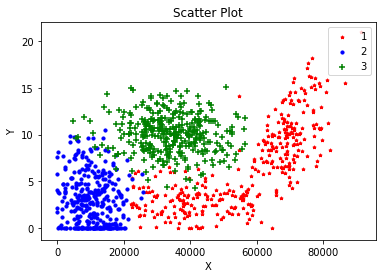

In [41]:
'''
采用散点图实现样本数据可视化
'''
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Scatter Plot')  
plt.xlabel('X') 
plt.ylabel('Y')  
#x = datingDataMat[:,1]
#y = datingDataMat[:,2]
#ax.scatter(x,y,c = 'r',marker = '*')  
#ax.scatter(datingDataMat[:,1],datingDataMat[:,2],15.0*np.array(datingLabels),15.0*np.array(datingLabels))
# 定义不同类别的散点为不同颜色与形状
datingLabels = np.array(datingLabels)
idx_1= np.where(datingLabels==1)# 类别1为红色*形散点
p1 = ax.scatter(datingDataMat[idx_1,0],datingDataMat[idx_1,1],marker= '*',color = 'r',label='1',s=10)
idx2=np.where(datingLabels==2)# 类别2为蓝色圆形散点
p2=ax.scatter(datingDataMat[idx2,0],datingDataMat[idx2,1],marker= 'o',color ='b',label='2',s=10)
idx3= np.where(datingLabels==3)# 类别3为绿色+形散点
p3=ax.scatter(datingDataMat[idx3,0],datingDataMat[idx3,1],marker= '+',color ='g',label='3',s=30)
plt.legend(loc = 'upper right')
plt.show()

In [46]:
'''
归一化样本数据中的特征值至[0,1]区间
'''
def autoNorm(dataSet):
    minVals = dataSet.min(0)# 取列维度最小值，即取某特征出现的最小值
    maxVals = dataSet.max(0)# 取列维度最大值，即取某特征值出现的最大值
    ranges = maxVals - minVals # 求特征值数值范围
    normDataSet = np.zeros(np.shape(dataSet))# 定义全0数组
    m = dataSet.shape[0] # 统计样本数
    normDataSet = dataSet - np.tile(minVals,(m,1)) 
    normDataSet = normDataSet/np.tile(ranges,(m,1)) # 归一化
    return normDataSet,ranges,minVals

In [47]:
normMat,ranges,minVals = autoNorm(datingDataMat)

In [53]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [54]:
def datingClassTest():
    hoRatio = 0.10
    datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')
    normMat,ranges,minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(0,numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print('the classifier came back with: %d,the real answer is %d %(classifierResult,datingLabels[i])')
        if(classifierResult != datingLabels[i]):
            errorCount += 1
    print('the total error rate is: %f %(errorCount/float(numTestVecs))')
    return
datingClassTest()

NameError: name 'operator' is not defined